# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/tkj9ep/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 63 (delta 10), reused 19 (delta 4), pack-reused 32
Receiving objects: 100% (63/63), 55.84 MiB | 20.38 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (26/26), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Part 1: Load the Data

location = "/content/visualization/assignment/data/college_completion.csv"

college_completion_dataset = pd.read_csv(location)

In [4]:
# Part 2: Dimensions, Observations, Variables

dimensions = college_completion_dataset.shape

print("Dimensions of the data:", dimensions)

print("Number of observations:", dimensions[0])

print("Variables:", college_completion_dataset.columns)

Dimensions of the data: (3798, 63)
Number of observations: 3798
Variables: Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first'

In [5]:
college_completion_dataset.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [6]:
# Part 3: Cross tabulate control and level

raw_ct = pd.crosstab(college_completion_dataset["control"], college_completion_dataset["level"], rownames = ["control"], colnames = ["level"])
normalized_ct = pd.crosstab(college_completion_dataset["control"], college_completion_dataset["level"], rownames = ["control"], colnames = ["level"], normalize = True)

print("raw_ct:\n", raw_ct, "\n")
print("normalized_ct:\n", normalized_ct, "\n")

raw_ct:
 level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

normalized_ct:
 level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



According to the crosstab, it seems like the joint value of **private not-for-profit** and **4-year** is the greatest with a value of $.31$. Then the second largest joint value would be **Public** and **2-year** with a value of $.24$. All the other joint values seem to be below $.17$ with the joint value of **private not-for-profit** and **2-year** having the smallest value.

<Axes: xlabel='grad_100_value', ylabel='Count'>

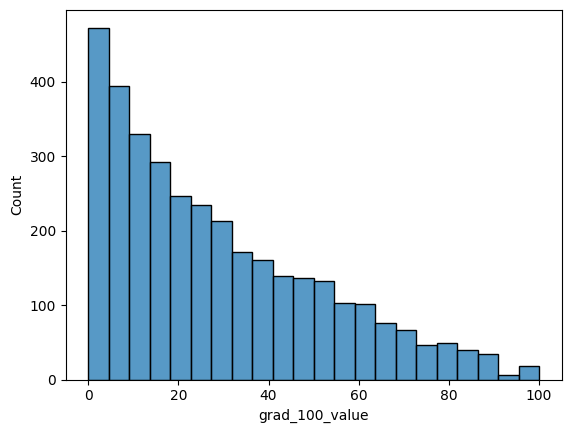

In [7]:
# Part 4: histogram, kernel density plot, boxplot, and statistical description
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = college_completion_dataset, x = "grad_100_value")

<Axes: xlabel='grad_100_value', ylabel='Density'>

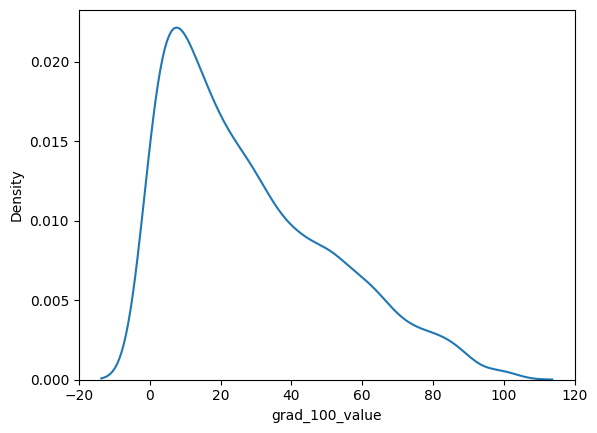

In [8]:
sns.kdeplot(data = college_completion_dataset, x = "grad_100_value")

<Axes: xlabel='grad_100_value'>

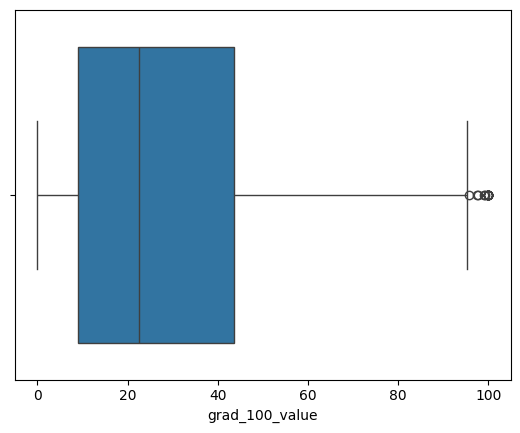

In [9]:
sns.boxplot(data = college_completion_dataset, x = "grad_100_value")

In [10]:
college_completion_dataset["grad_100_value"].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

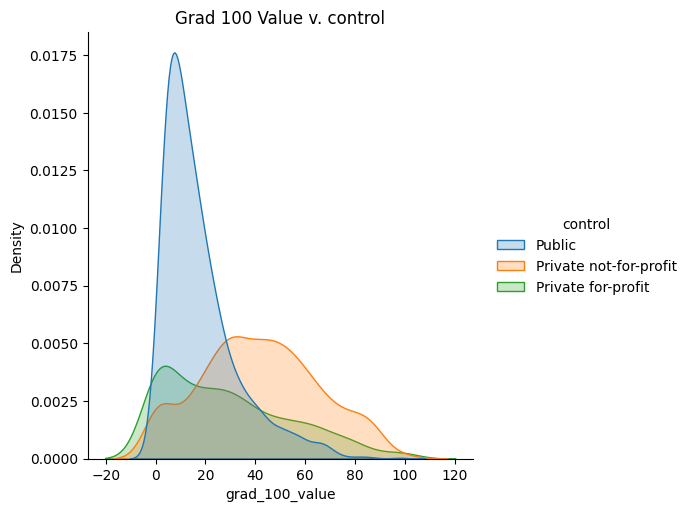

In [11]:
# Part 5: grouped kernel density plot by control and level for grad_100_value
sns.displot(data = college_completion_dataset, x = "grad_100_value", kind = "kde", hue = "control",
            fill = True).set(title = "Grad 100 Value v. control")

plt.show()

In [12]:
college_completion_dataset.loc[:, ["control", "grad_100_value"]].groupby("control").describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

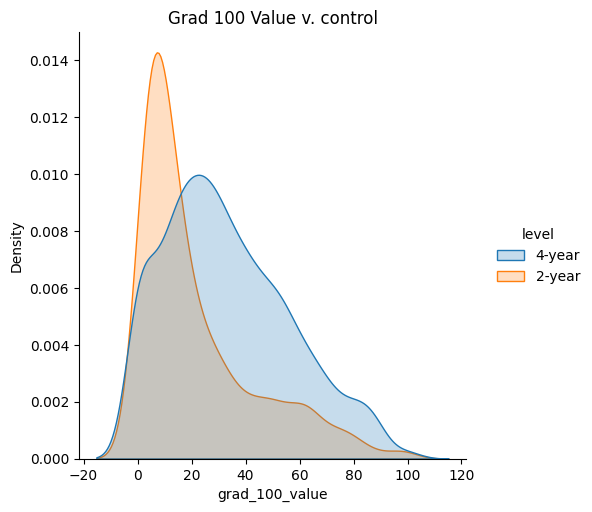

In [13]:
sns.displot(data = college_completion_dataset, x = "grad_100_value", kind = "kde", hue = "level",
            fill = True).set(title = "Grad 100 Value v. control")

plt.show()

In [14]:
college_completion_dataset.loc[:, ["level", "grad_100_value"]].groupby("level").describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

For the **grad_100_value** vs **control**, it seems like **public** has a very high density a little less than the $20$% mark but has a very small spread. The mean for **public** is around $17$%. The **Private not-for-profit** has the most "normal" distribution centered around the $45$% tick with a mean of around $42$% and the **Private for-profit** has very right-skewed like that of the **public** density plot with the highest density $5$% tick range with a mean of around $29$%.

For the **grad_100_value** vs **level** density plot, the **2-year** density plot is sharper than that of the **4-year** density plot. In addition, the **4-year** seems be around a value of $12$ points higher than that of the **2-year**.

It seems as if the **4-year** institutions and the **Private not-for-profit** have a higher graduation rate.

In [15]:
# Part 6: New Variable

college_completion_dataset["levelXcontrol"] = college_completion_dataset["level"] + ", " + college_completion_dataset["control"]
college_completion_dataset["levelXcontrol"].head()

0                    4-year, Public
1                    4-year, Public
2    4-year, Private not-for-profit
3                    4-year, Public
4                    4-year, Public
Name: levelXcontrol, dtype: object

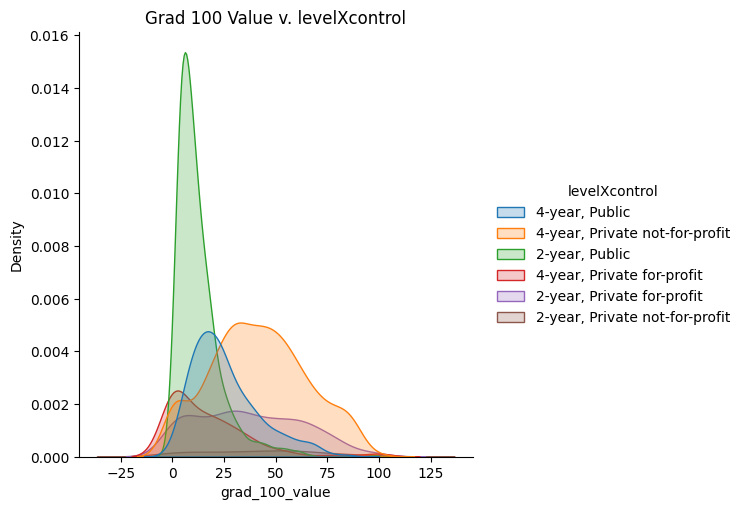

In [16]:
sns.displot(data = college_completion_dataset, x = "grad_100_value", kind = "kde", hue = "levelXcontrol", fill = True).set(title = "Grad 100 Value v. levelXcontrol")
plt.show()

In [17]:
college_completion_dataset.loc[:, ["grad_100_value", "levelXcontrol"]].groupby("levelXcontrol").describe()

grad_100_value                             \
                                        count       mean        std  min   
levelXcontrol                                                              
2-year, Private for-profit              461.0  37.197614  25.497380  0.0   
2-year, Private not-for-profit           68.0  41.913235  28.348302  0.0   
2-year, Public                          926.0  12.400000  10.893600  0.0   
4-year, Private for-profit              318.0  17.382704  20.788525  0.0   
4-year, Private not-for-profit         1121.0  41.645674  23.243453  0.0   
4-year, Public                          573.0  25.561082  16.403902  0.0   

                                                             
                                   25%   50%     75%    max  
levelXcontrol                                                
2-year, Private for-profit      15.800  33.9  57.800  100.0  
2-year, Private not-for-profit  16.225  44.4  61.200  100.0  
2-year, Public                   5.100   9.4  16.175   97.8  
4-year, Private for-profit       0.000  12.5  26.325  100.0  
4-year, Private not-for-profit  25.000  41.0  57.800  100.0  
4-year, Public                  13.600  21.8  33.800   86.3

It seems like the **2-year, Private not-for-proft** had the best graduation rate with a value of $41.91$. The second best is **4-year, Private not-for-profit** which yields a value of $41.65$. The **2-year, Private for-profit** is more than double than that of **4-year, Private for-profit**. The **2-year, Public** had lowest value among all the categories. There is quite a bit of heterogeneity and I did not expect that a **2-year, Private not-for-profit** is actually pretty good.

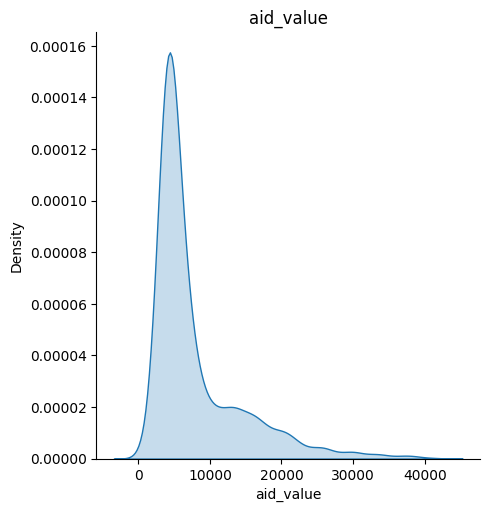

In [18]:
# Part 7: kernel density plot for aid_value

sns.displot(data = college_completion_dataset, x = "aid_value", kind = "kde", fill = True).set(title = "aid_value")

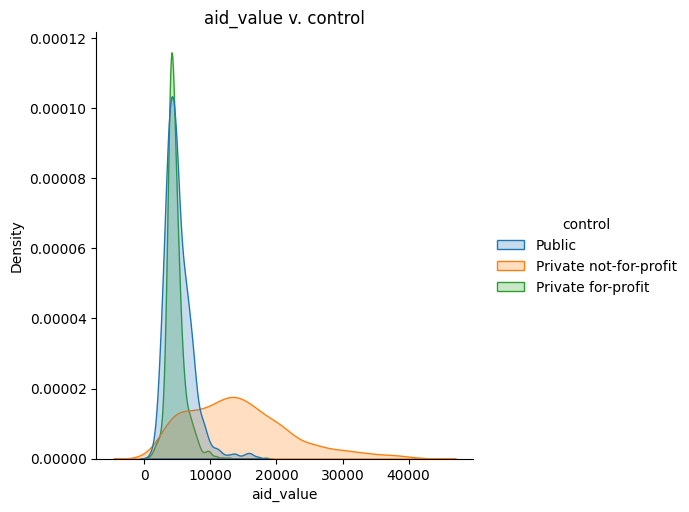

In [19]:
sns.displot(data = college_completion_dataset, x = "aid_value", kind = "kde", hue = "control", fill = True).set(title = "aid_value v. control")

In [20]:
college_completion_dataset.loc[:, ["aid_value", "control"]].groupby("control").describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

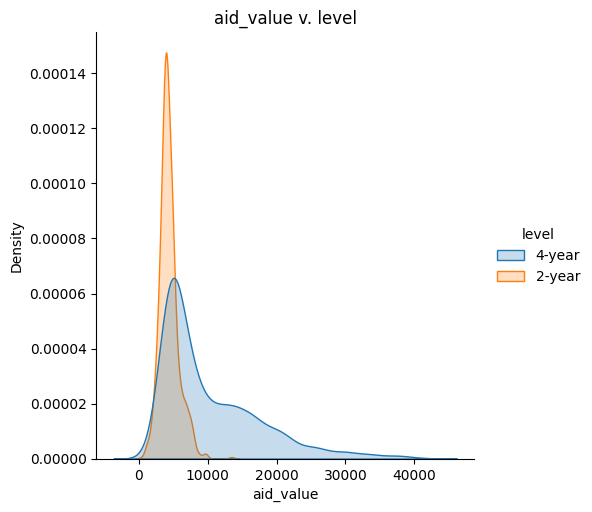

In [21]:
sns.displot(data = college_completion_dataset, x = "aid_value", kind = "kde", hue = "level", fill = True).set(title = "aid_value v. level")

In [22]:
college_completion_dataset.loc[:, ["aid_value", "level"]].groupby("level").describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

I think an explanation for the shape of the graph for the **aid_value v. control** is that **public** and **Private for-profit** both offer a greater aid or some sort of incentive for students to work for them. As evident from the table, the mean for **Private not-for-profit** is significantly higher than the other categories. However, **Private for-profit** and **Private not-for-profit** seem to still give some sort of aid.

In the case for the **aid_value v. level**, the **4-year** tends to offer more money because **4-year** are generally more expensive than **2-year** institutions.

[Text(0.5, 1.0, 'aid_value v. grad_100_value')]

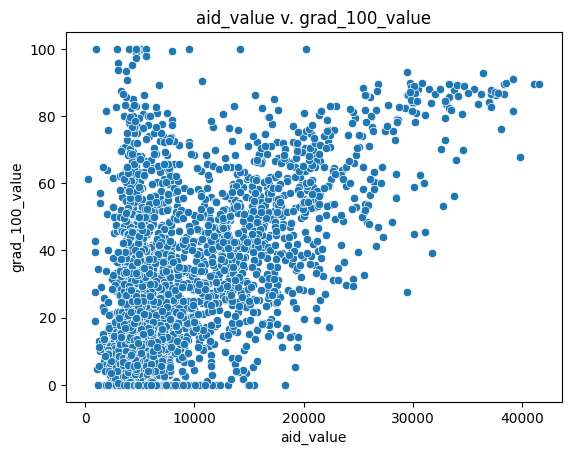

In [23]:
# Part 8: scatterplot

sns.scatterplot(data = college_completion_dataset, x = "aid_value", y = "grad_100_value").set(title = "aid_value v. grad_100_value")

It seems as if there is no clear trend but there does seem to exist a mild positive linear relationship. In some cases, the **grad_100_value** seem independent from the **aid_value**. The datapoints are pretty heavily focused on the lower left side of the graph.

[Text(0.5, 1.0, 'aid_value v. grad_100_values (level)')]

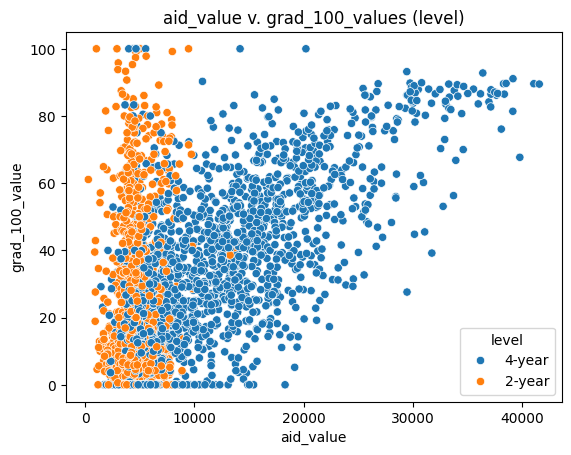

In [24]:
sns.scatterplot(data = college_completion_dataset, x = "aid_value", y = "grad_100_value", hue = "level").set(title = "aid_value v. grad_100_values (level)")

For the **aid_value v. grad_100_values (level)**, it seems as if the **4-year** institutions have a linear relationships while the **2-year** institutions exhibit some sort of independence between **grad_100_value** and **aid_value**.

[Text(0.5, 1.0, 'aid_value v. grad_100_values (control)')]

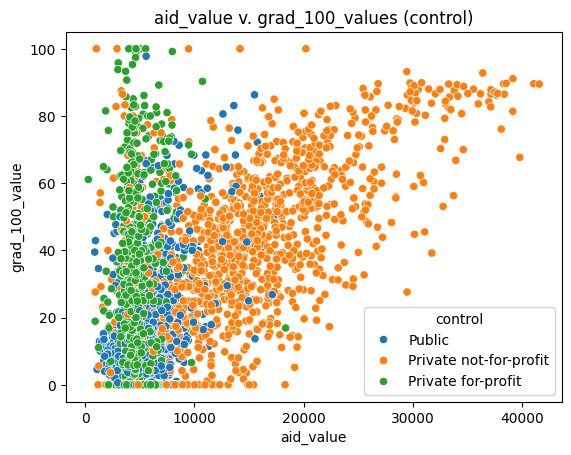

In [25]:
sns.scatterplot(data = college_completion_dataset, x = "aid_value", y = "grad_100_value", hue = "control").set(title = "aid_value v. grad_100_values (control)")

For the **aid_value v. grad_100_values (control)**, it seems as if the **Private not-for-profit** exhibits a positive linear relationship/trend. The **Public** group seems to have very mild positive trend and the **Private for-profit** seem to have almost no trend.

[Text(0.5, 1.0, 'aid_value v. grad_100_values (levelXcontrol)')]

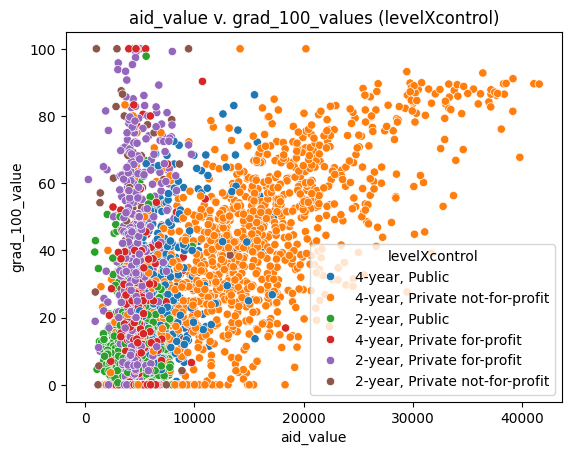

In [26]:
sns.scatterplot(data = college_completion_dataset, x = "aid_value", y = "grad_100_value", hue = "levelXcontrol").set(title = "aid_value v. grad_100_values (levelXcontrol)")

It seems as if **4-year** institutions and **Private not-for-profit** institutions have the highest positive trend between **grad_100_value** and **aid_value**. Perhaps **Private not-for-profit** are providing aid in order to incentivize **4-year** students to work for them.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
6. Create a scatter plot, and describe the relationship you see.
7. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

In [86]:
filepath = "/content/visualization/assignment/puf2021_1_fall.csv"

medicare_dataset = pd.read_csv(filepath)
medicare_dataset.head()

<ipython-input-86-b1858d151047>:3: DtypeWarning: Columns (43,46,49,50,51,52,53,73,76,77,81,82,83,85,90,92,99,100,105,106,107,112,113,118,119,123,124,125,126,128,129,135,136,137,138,139,140,142,143,151,155,156,161,163,172,176,183,184,185,186,191,192,193,194,195,197,198,199,200,208,209,210,211,214,217,218,219,220,221,222,223,224,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  medicare_dataset = pd.read_csv(filepath)


,PUF_ID,SURVEYYR,VERSION,ADM_H_MEDSTA,ADM_H_GHPSW,ADM_H_PDRS,ADM_OP_MDCD,ADM_DUAL_FLAG_YR,ADM_FFS_FLAG_YR,ADM_MA_FLAG_YR,...,PUFF091,PUFF092,PUFF093,PUFF094,PUFF095,PUFF096,PUFF097,PUFF098,PUFF099,PUFF100
0,21000003,2021,1,1,2,1.0,1,1,3,1,...,988.252590,5273.441518,1095.075758,1245.906455,6049.581125,994.556718,5490.385215,1264.822658,5632.555206,989.464837
1,21000004,2021,1,1,2,1.0,1,1,3,1,...,22599.768459,3574.297077,2905.632202,3011.695926,4283.873099,18154.868227,16722.373362,15553.879545,14193.033902,18737.870831
2,21000005,2021,1,1,2,1.0,1,1,3,1,...,3998.371708,3748.552103,574.146156,4082.909199,559.108837,571.423027,3550.951071,4554.459435,605.491265,612.180490
3,21000011,2021,1,1,2,1.0,1,1,3,1,...,5679.361042,982.382754,1046.200903,1103.813758,1085.475033,1231.049575,1157.845607,720.394183,1134.894480,778.578574
4,21000012,2021,1,1,1,1.0,2,3,1,3,...,12188.282713,14418.230488,10457.419141,2761.012141,2160.504248,2346.820214,2230.871858,17188.553558,12597.595445,13900.497117


In [87]:
medicare_dataset.shape

(12783, 337)

2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

The data dictionary kind of seems to document how missings are documented. One way is with follow-up questions and warns that there may be missing values in the data. More specifically, the on page 20 of the document, it reads that missings are represented by a code such as .D, .R, or .N. Not necessarily the data dictionary but the txt file associated with the csv file doess describe possible values and missing value codes. The txt file does describe how missing values are handled, typically with a string.

Ultimately, I think the data dictionary is somewhat useful. The major problem with the data dictionary does not explicitly describe each feature/variable in the dataset which the txt file handles. It would be nice if the txt files were appended to the data dictionary. In addition, the technical report/information is not really helpful since some of the information seems irrelevant to the current dataset of interest. However, it does provide good context on the origin and how the data was created.

3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

In [88]:
variables_of_interest = ["DEM_SEX", "DEM_AGE", "DEM_RACE", "DEM_EDU"]

I picked the sex, age, race, and education to see its affect on medicare status.

In [102]:
def print_unique_values(category):
  print(medicare_dataset[category].unique(),  "\n")
  print(medicare_dataset[category].value_counts(), "\n")
  print(type(medicare_dataset.loc[0, category]), "\n")

In [103]:
print_unique_values("ADM_H_MEDSTA")

[1 2 3] 

1    10627
2     2139
3       17
Name: ADM_H_MEDSTA, dtype: int64 

<class 'numpy.int64'> 



Nothing required for this particular feature since it will simply serve as our y function.

In [104]:
# DEM_SEX

print_unique_values("DEM_SEX")

['Female' 'Male'] 

Female    6919
Male      5864
Name: DEM_SEX, dtype: int64 

<class 'str'> 



In [105]:
def convert_sex(x):
  if x == 1:
    return "Male"
  return "Female"

medicare_dataset["DEM_SEX"] = medicare_dataset["DEM_SEX"].apply(lambda x : convert_sex(x))
print_unique_values("DEM_SEX")

['Female'] 

Female    12783
Name: DEM_SEX, dtype: int64 

<class 'str'> 



Convert all values to string and their actual meaning since this is technically a categorical variable and it makes more sense.

In [106]:
print_unique_values("DEM_AGE")

[3 2 1] 

3    6119
2    4508
1    2156
Name: DEM_AGE, dtype: int64 

<class 'numpy.int64'> 



In [107]:
medicare_dataset["DEM_AGE"] = medicare_dataset["DEM_AGE"].apply(lambda x : str(x))
print_unique_values("DEM_AGE")

['3' '2' '1'] 

3    6119
2    4508
1    2156
Name: DEM_AGE, dtype: int64 

<class 'str'> 



Convert all values to string since this is technically a categorical variable.

In [108]:
print_unique_values("DEM_RACE")

[1 2 3 4] 

1    9467
3    1396
2    1211
4     709
Name: DEM_RACE, dtype: int64 

<class 'numpy.int64'> 



In [109]:
medicare_dataset["DEM_RACE"] = medicare_dataset["DEM_RACE"].apply(lambda x : str(x))
print_unique_values("DEM_RACE")

['1' '2' '3' '4'] 

1    9467
3    1396
2    1211
4     709
Name: DEM_RACE, dtype: int64 

<class 'str'> 



In [110]:
print_unique_values("DEM_EDU")

['3' '2' '1' 'D' 'R'] 

3    7004
2    3966
1    1747
D      39
R      27
Name: DEM_EDU, dtype: int64 

<class 'str'> 



The datatype for the **DEM_EDU** seems to be string. So I plan to convert all the cases of *D* and *R* to $0$ for unknown since either way, the education level is unknown.

In [111]:
def set_to_zero(categories_to_replace, value_of_interest): # function for replacing any value to 0
  for category in categories_to_replace:
    if value_of_interest == category:
      return "0"

  return value_of_interest

In [112]:
edu_subset = medicare_dataset["DEM_EDU"].apply(lambda x : set_to_zero(["D", "R"], x))
edu_subset = edu_subset.apply(lambda x : int(x))
edu_subset.unique()


array([3, 2, 1, 0])

In [113]:
medicare_dataset["DEM_EDU"] = edu_subset
print_unique_values("DEM_EDU")

[3 2 1 0] 

3    7004
2    3966
1    1747
0      66
Name: DEM_EDU, dtype: int64 

<class 'numpy.int64'> 



Finally, the **DEM_EDU** category is all strings where $0$ represents unknown or inapplicable value.

4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

In [114]:
# create boxplot for numeric variable
def create_bargraph(category):
  sns.barplot(data = medicare_dataset, x = category, y = "ADM_H_MEDSTA")
  plt.show()

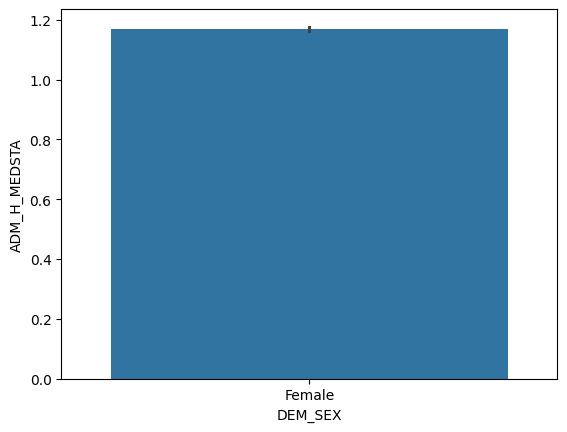

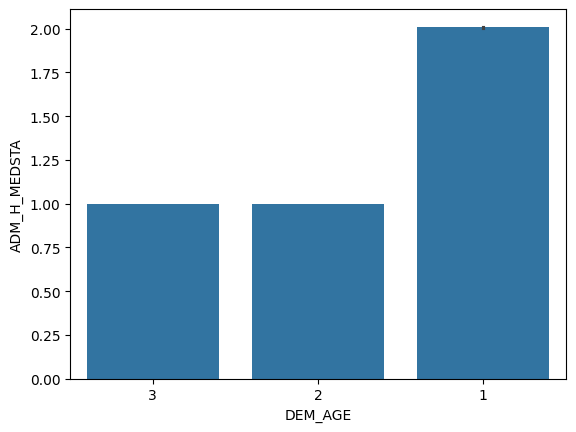

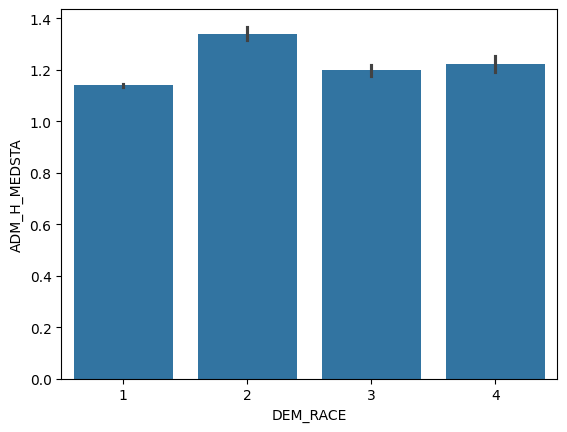

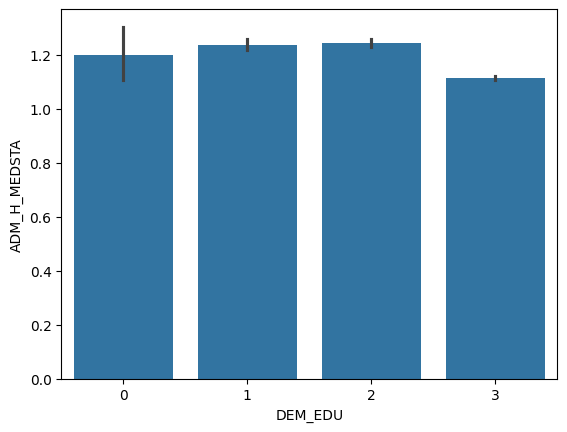

In [115]:
for i in variables_of_interest:
  create_bargraph(i)

As of now, these are the observations of these particular demographics with $y$ being **ADM_H_MEDSTA**.

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?